# **Lucas Buk Cardoso - RA: 20.84113-2**
# **Leonardo Vila Franca Siva - RA: 20.84109-4**
# **Lívia Zanfelici Fanucchi - RA: 20.84071-3**

# **Enunciado**

Neste trabalho é pedido para vocês desenvolvam uma solução de machine learning que traga valor para o seguinte problema: baseado nos dados descritivos de produtos digitais, é pedido que vocês criem um algoritmo capaz de classificar os produtos em diferentes categorias (no caso 5 categorias). 
 
Essa solução pode abordar diversos caminhos diferentes que você pode escolher. No caso estamos falando de um problema de classificação com múltiplas classes. Você pode seguir abordagens com múltiplos modelos de classificação, stacking de modelos, um único modelo... entre outros. Você está livre para decidir.
 
A base de dados se encontra no seguinte link:
https://drive.google.com/file/d/1PXncCZ9FIJ_AK5wP-YyeKDWNpMfzcswG/view?usp=sharing
 
Caso tenham problema no acesso por favor me avise.

# **Prazo**

O prazo de entrega será até o fim do curso da pós-graduação, dia 24 de junho de 2021. Caso precisem de mais tempo, por favor me avisem com antecedência.

# **Nota**

Todos vocês começam o trabalho com 10 pontos. A cada erro de conceito, será descontado 1.0 ponto da nota, e cada erro de sintaxe de código será descontado 0.5 . Se você escolher fazer o trabalho em grupo, será descontado 0.1 ponto a mais em cada erro para cada integrante do grupo, e.g. se você tiver 3 pessoas no grupo e produzir um erro conceitual, você perderá 1.0 + 0.3 (0.1 para cada integrante), um total de 1.3 pontos pelo erro.

Vocês devem entregar a solução completa. Todas as etapas do CRISP, menos a etapa de deploy do modelo. Todas as soluções desenvolvidas devem ser documentadas e todo o código deve respeitas as condições PEP do Python.
 
# **Entrega**

A entrega será feita pelo próprio Teams ou pelo meu email marcelo.lima@maua.br. Deverá ser entregue toda a pasta com sua solução, base de dados e afins.
 
SEU CÓDIGO DEVE RODAR DE PRIMEIRA! Todos os requisitos do trabalhinho do meio do curso, seguem com a mesma criticidade. Deve ser entregue o notebook, com o arquivo requirements.txt contendo todas as bibliotecas utilizadas por vocês.
 
Além disso, vocês deveram preparar uma apresentação de slides, com ilustrações explicando o resultado do modelo de vocês como se vocês estivessem explicando a qualidade do produto que fizeram para um cliente.

# **Instalação requirements.txt**

In [ ]:
!pip install -r requirements.txt

# **Aquisição de Dados**

---

Leitura dos dados dos produtos.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/01_raw/products_dataset.csv') 
df.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [2]:
df.shape

(38507, 15)

### **Preparação dos labels**

Utilização da biblioteca LabelEncoder para deixar os labels com valores numéricos entre 0 e 5.

In [3]:
df.category.value_counts()

Lembrancinhas         17759
Decoração              8846
Bebê                   7026
Papel e Cia            2777
Outros                 1148
Bijuterias e Jóias      951
Name: category, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df.category = lb.fit_transform(df.category)

df.category.value_counts()

3    17759
2     8846
0     7026
5     2777
4     1148
1      951
Name: category, dtype: int64

# **Análise do dataframe**

---

Análise dos tipos das variáveis do problema, da quantidade de valores faltantes e das correlações entre as variáveis.

### **Tipos das variáveis**

In [5]:
df.dtypes

product_id             int64
seller_id              int64
query                 object
search_page            int64
position               int64
title                 object
concatenated_tags     object
creation_date         object
price                float64
weight               float64
express_delivery       int64
minimum_quantity       int64
view_counts            int64
order_counts         float64
category               int32
dtype: object

### **Valores faltantes**

In [ ]:
df.isna().sum().sort_values(ascending=False)

order_counts         20390
weight                  58
concatenated_tags        2
category                 0
view_counts              0
minimum_quantity         0
express_delivery         0
price                    0
creation_date            0
title                    0
position                 0
search_page              0
query                    0
seller_id                0
product_id               0
dtype: int64

### **Correlação das variáveis**

c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


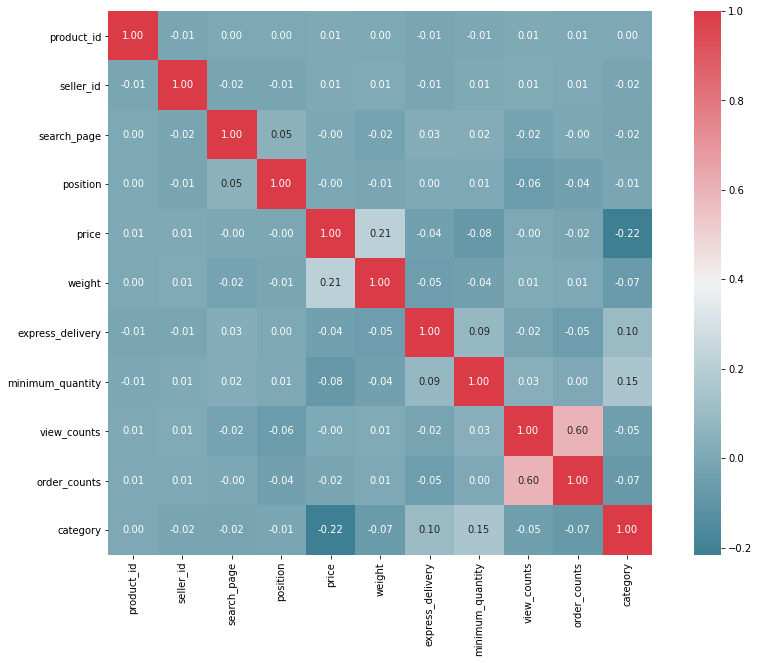

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(correlations, cmap = colormap, annot = True, fmt = '.2f', square=True)
fig.show()

### **Variáveis categóricas**

Separação das variáveis categóricas do dataset.

In [6]:
# Retorno dos categóricos
categoricos = df.select_dtypes(include='object').columns
categoricos

Index(['query', 'title', 'concatenated_tags', 'creation_date'], dtype='object')

In [7]:
df[categoricos].isna().sum().sort_values(ascending=False)

concatenated_tags    2
creation_date        0
title                0
query                0
dtype: int64

### **Variáveis numéricas**

Separação das variáveis numéricas do dataset.

In [8]:
# Retorno dos numéricos
numericos = df.select_dtypes(exclude='object').columns
numericos

Index(['product_id', 'seller_id', 'search_page', 'position', 'price', 'weight',
       'express_delivery', 'minimum_quantity', 'view_counts', 'order_counts',
       'category'],
      dtype='object')

In [9]:
df[numericos].isna().sum().sort_values(ascending=False)

order_counts        20390
weight                 58
category                0
view_counts             0
minimum_quantity        0
express_delivery        0
price                   0
position                0
search_page             0
seller_id               0
product_id              0
dtype: int64

# **Pré-processamento**

---

### **Remoção dos valores nulos**

> Para as variáveis categóricas será colocado no lugar dos valores faltantes `##Sem descricao##`, assim é considerada como uma categoria diferente das já existentes naquelas variáveis.

In [10]:
df[categoricos] = df[categoricos].fillna('##Sem descricao##')

> Para as variáveis numéricas será colocado no lugar dos valores faltantes somente 0.

In [11]:
df[numericos] = df[numericos].fillna(0)

### **Separação em treino e teste**

Antes da separação o dataset será ordenado pela data, assim as classificações serão feitas para os valores com a data mais atual.

In [12]:
df_ordenado = df.sort_values(by='creation_date', ignore_index=True)
df_ordenado.head(2)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,14229551,5243703,sacola de papel kraft,1,21,Sacola kraft media c/ papel rendado,sacolas papel coloridas niver anna's,2008-11-05 22:57:17,12.26,6.0,0,4,129,7.0,5
1,1125256,9711820,porta retrato com palitos de sorvete,1,19,CAIXA PORTA-CHÁ,artesanato palitos sorvete,2008-11-10 17:43:17,83.94,0.0,0,4,23,7.0,5


Separação dos dados em treino e teste para realizar o treinamento e a validação dos modelos de machine learning, o parâmetro `suffle` garante a divisão correta do dataframe ordenado, com o conjunto de dados mais antigo sendo para o treinamento e as datas mais recentes no conjunto de teste.

In [13]:
# Separação entre features e label
label = df_ordenado.category.copy()
feat_cols = df_ordenado.columns
feat_cols = feat_cols.drop('category')
feat = df_ordenado[feat_cols].copy()

# Separação em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.25, random_state=7, shuffle=False)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28880, 14), (9627, 14), (28880,), (9627,))

In [15]:
X_train.tail(2)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
28878,7903614,9377206,dia dos pais,1,24,Chinelo Dia dos Pais 2ª linha,chinelo dia pais dora personalizado dia pais p...,2018-06-28 18:24:50,14.160000,287.0,1,20,476,27.0
28879,11573689,9377206,lembrancinha masculina,2,2,Chinelo dia Dos professores 2ª linha,chinelo dia professores dia professores,2018-06-28 18:31:08,15.059999,289.0,1,20,137,24.0


In [16]:
X_test.head(2)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
28880,8428008,9159926,forma para placa cimento 3d,1,35,Forma em Silicone p/ Gesso 3D Malm | Medusa 29x29,placas,2018-06-28 18:38:49,95.41,2000.0,0,10,125,21.0
28881,4233862,6341935,saquinho maternidade,3,4,6 Saquinhos Maternidade com viés Azul Marinho Poá,saquinhos maternidade,2018-06-28 18:56:26,119.07,42.0,1,6,230,6.0


### **Coluna com a data**

Utilização da data com uma coluna para cada um dos valores do dia, mês e ano. Após a criação, a coluna original da data será retirada dos dados.

In [17]:
X_train['creation_year'] = pd.to_datetime(X_train.creation_date, format='%Y-%m-%d %H:%M:%S').dt.year
X_train['creation_month'] = pd.to_datetime(X_train.creation_date, format='%Y-%m-%d %H:%M:%S').dt.month
X_train['creation_day'] = pd.to_datetime(X_train.creation_date, format='%Y-%m-%d %H:%M:%S').dt.day

X_train.drop(columns='creation_date', inplace=True)

c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

### **NLP**

Etapa de NLP com as colunas `query` e `title` do DataFrame, para ambos serão realizadas as etapas de obter a frase em letras minúsculas, realizar a tokenização, remoção de stop words e reconstrução da frase. Após isso, é possível utilizar o vetorizador para transformar as frases em diversas colunas numéricas.

In [18]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [19]:
# Funções para realização de algumas etapas da NLP
def minusculo(frase):
    """Função para deixar as frases em letra minúscula
    """
    return frase.lower()

def remover_stops(frase_tokenizada, stw_parametro):
    """Função para remover as stop words das frases
    """
    return [palavra for palavra in frase_tokenizada if palavra not in stw_parametro]

def reconstroi_frase(lista_palvras):
    """Função para reconstruir a frase já sem as stop words
    """
    return ' '.join(lista_palvras)

In [20]:
title = X_train['title'].copy()
title.head()

0     Sacola kraft media c/ papel rendado
1                         CAIXA PORTA-CHÁ
2                   Lembrancinha batizado
3              Puxadores bichinhos de mar
4    sapatinho de bebê somente no atacado
Name: title, dtype: object

In [21]:
query = X_train['query'].copy()
query.head()

0                   sacola de papel kraft
1    porta retrato com palitos de sorvete
2                   lembrancinha batizado
3                      puxadores infantil
4                     sapatinhos de trico
Name: query, dtype: object

In [22]:
from nltk.tokenize import word_tokenize

# Minúsculo e Tokenizer
title = title.apply(minusculo)

title_token = title.apply(word_tokenize)
title_token.head()

0     [sacola, kraft, media, c/, papel, rendado]
1                             [caixa, porta-chá]
2                       [lembrancinha, batizado]
3                [puxadores, bichinhos, de, mar]
4    [sapatinho, de, bebê, somente, no, atacado]
Name: title, dtype: object

In [23]:
# Minúsculo e Tokenizer
query = query.apply(minusculo)

query_token = query.apply(word_tokenize)
query_token.head()

0                     [sacola, de, papel, kraft]
1    [porta, retrato, com, palitos, de, sorvete]
2                       [lembrancinha, batizado]
3                          [puxadores, infantil]
4                        [sapatinhos, de, trico]
Name: query, dtype: object

In [24]:
from nltk.corpus import stopwords
from string import punctuation

stw = stopwords.words('portuguese')
pont = list(punctuation)

stw_pt = list(set(stw + pont)) # Lista com stop words e pontuação

In [25]:
# Remoção das stops words e reconstrução das frases
title_token_sem_stop = title_token.apply(remover_stops, stw_parametro = stw_pt)
X_train['title_final'] = title_token_sem_stop.apply(reconstroi_frase)

c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Remoção das stops words e reconstrução das frases
query_token_sem_stop = query_token.apply(remover_stops, stw_parametro = stw_pt)
X_train['query_final'] = query_token_sem_stop.apply(reconstroi_frase)

c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Vetorizador da coluna title
vect_title = CountVectorizer(analyzer = 'word', min_df = 10, max_df= 0.8)

X_train_title = vect_title.fit_transform(X_train['title_final'])
X_train_title.shape

(28880, 1320)

In [28]:
# Vetorizador da coluna query
vect_query = CountVectorizer(analyzer = 'word', min_df = 10, max_df= 0.8)

X_train_query = vect_query.fit_transform(X_train['query_final'])
X_train_query.shape

(28880, 844)

In [29]:
# Merge para formar o DataFrame de treino
X_train_title_query = pd.merge(pd.DataFrame(X_train_title.todense()), pd.DataFrame(X_train_query.todense()), 
                               left_index=True, right_index=True)
X_train_title_query.shape

(28880, 2164)

### **Normalização**

Normalização das colunas númericas presentes no dataset.

In [66]:
numericos = X_train.select_dtypes(exclude='object').columns
numericos

Index(['product_id', 'seller_id', 'search_page', 'position', 'price', 'weight',
       'express_delivery', 'minimum_quantity', 'view_counts', 'order_counts',
       'creation_year', 'creation_month', 'creation_day'],
      dtype='object')

In [31]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train[numericos] = minmax.fit_transform(X_train[numericos])

c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [32]:
X_train_ = X_train_title_query.merge(X_train[numericos], how='left', left_index=True, right_index=True)
X_train_.shape

(28880, 2177)

### **Balanceamento**

Utilização do método oversampling para balanceamento dos dados de treino.

In [33]:
# Quantidade de valores para cada label nos dados de treino
y_train.value_counts()

3    13129
2     6844
0     5472
5     1902
4      818
1      715
Name: category, dtype: int64

In [34]:
# Fazendo o Oversampling dos dados de treino
from imblearn.over_sampling import SMOTE

X_, y_ = SMOTE(random_state=0).fit_resample(X_train_, y_train)

In [35]:
y_.value_counts()

5    13129
4    13129
3    13129
2    13129
1    13129
0    13129
Name: category, dtype: int64

# **Treinamento dos modelos de ML**

---

Após as etapas de pré-processamento dos dados, será realizado o treinamento dos modelos de classificação LightGBM, MultinomialNB e Regressão Logística.

Características de cada modelo:

* LightGBM - algoritmo de aprendizagem baseado em árvore utilizando o método de gradient boosting. Apresentou mais rapidez em relação ao XGBoost nos testes realizados com os dados e um excelente desempenho.

* MultinomialNB - implementa o algoritmo naive Bayes para dados distribuídos multinomialmente, muito utilizado em problemas com classificação de textos, similares a este trabalho.

* Regressão Logística - A regressão logística é um modelo estatístico que em sua forma básica usa uma função logística para modelar uma variável dependente binária, também é de simples implementação e apresentou bons resultados.

In [63]:
import lightgbm as lgb

lightgbm = lgb.LGBMClassifier(n_estimators=300, max_depth=15, 
                              class_weight={4:30, 5:20}) # Peso maior nas classes 4 e 5 porque modelo apresenta 
                                                         # menor acertividade nelas
lightgbm.fit(X_, y_)

LGBMClassifier(class_weight={4: 30, 5: 20}, max_depth=15, n_estimators=300)

In [45]:
from sklearn.naive_bayes import MultinomialNB

multiNB = MultinomialNB()
multiNB.fit(X_, y_)

MultinomialNB()

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150, 
                        class_weight={1:0.5, 4:10, 5:3}) # Peso maior nas classes 4 e 5 porque modelo apresenta 
                                                         # menor acertividade nelas, caso oposto para a classe 1
lr.fit(X_,y_)

c:\users\lucas\anaconda3\envs\elo7env\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight={1: 0.5, 4: 10, 5: 3}, max_iter=150)

# **Validação dos modelos**

---

Após o treinamento dos modelos, utiliza-se os dados de teste para verificar o desempenho dos modelos utilizados. Porém, é necessário realizar o pré-processamento dos dados de teste antes da validação.

### **Pré-processamento dos dados de teste**

In [37]:
def test_preprocessing(X_test, vect_title, vect_query, norm):
    """Função para realizar o pré-processamento dos dados de teste
    """

    df_aux = X_test.copy().reset_index(drop=True)

    # Data
    df_aux['creation_year'] = pd.to_datetime(df_aux.creation_date, format='%Y-%m-%d %H:%M:%S').dt.year
    df_aux['creation_month'] = pd.to_datetime(df_aux.creation_date, format='%Y-%m-%d %H:%M:%S').dt.month
    df_aux['creation_day'] = pd.to_datetime(df_aux.creation_date, format='%Y-%m-%d %H:%M:%S').dt.day

    df.drop(columns='creation_date', inplace=True)

    # Title
    title_test = df_aux['title'].apply(minusculo)
    title_test = title_test.apply(word_tokenize)
    title_test = title_test.apply(remover_stops, stw_parametro = stw_pt)
    df_aux['title_final'] = title_test.apply(reconstroi_frase)
    X_test_title = vect_title.transform(df_aux['title_final'])

    # Query
    query_test = df_aux['query'].apply(minusculo)
    query_test = query_test.apply(word_tokenize)
    query_test = query_test.apply(remover_stops, stw_parametro = stw_pt)
    df_aux['query_final'] = query_test.apply(reconstroi_frase)
    X_test_query = vect_query.transform(df_aux['query_final'])

    # Merge
    X_test_title_query = pd.merge(pd.DataFrame(X_test_title.todense()), pd.DataFrame(X_test_query.todense()), 
                                  left_index=True, right_index=True)
    
    # Normalização
    df_aux[numericos] = minmax.transform(df_aux[numericos].copy())
    X_test_ = X_test_title_query.merge(df_aux[numericos], how='left', left_index=True, right_index=True)

    return X_test_

In [38]:
X_test_ = test_preprocessing(X_test, vect_title, vect_query, minmax)
X_test_.shape

(9627, 2177)

### **Matriz de confusão**

Validação dos modelos LightGBM, MultinomialNB e Regressão Logística utilizando a matriz de confusão para verificar o desempenho deles para as classes, visando um desempenho equilibrado na diagonal principal da matriz. 

In [49]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

labels = lb.classes_.tolist()
labels

['Bebê',
 'Bijuterias e Jóias',
 'Decoração',
 'Lembrancinhas',
 'Outros',
 'Papel e Cia']

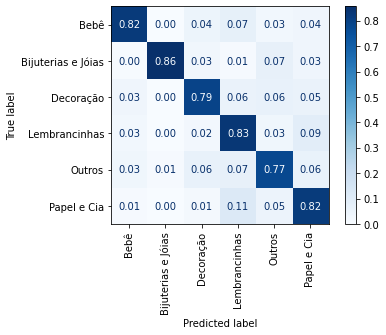

In [64]:
# LightGBM
plot_confusion_matrix(lightgbm, X=X_test_.values, y_true=y_test, cmap='Blues', 
                      normalize='true', values_format='.2f', display_labels=labels, 
                      xticks_rotation='vertical')
plt.show()

In [65]:
acc_lgb = accuracy_score(y_test, lightgbm.predict(X_test_.values))
print(f'Acurácia do modelo LightGBM = {acc_lgb:.2f}')

Acurácia do modelo LightGBM = 0.82


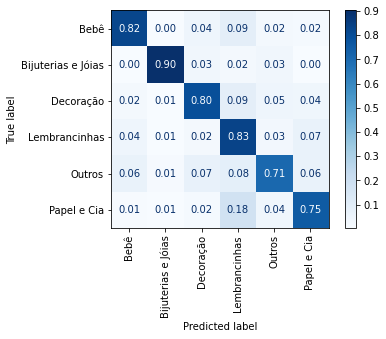

In [52]:
# MultinomialNB
plot_confusion_matrix(multiNB, X=X_test_.values, y_true=y_test, cmap='Blues',
                      normalize='true', values_format='.2f', display_labels=labels, 
                      xticks_rotation='vertical')
plt.show()

In [53]:
acc_multinb = accuracy_score(y_test, multiNB.predict(X_test_.values))
print(f'Acurácia do modelo MultinomialNB = {acc_multinb:.2f}')

Acurácia do modelo MultinomialNB = 0.81


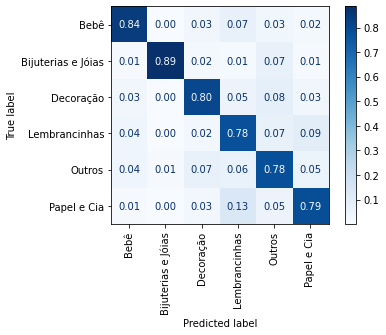

In [54]:
# Regressão Logística
plot_confusion_matrix(lr, X=X_test_.values, y_true=y_test, cmap='Blues', 
                      normalize='true', values_format='.2f', display_labels=labels, 
                      xticks_rotation='vertical')
plt.show()

In [55]:
acc_lr = accuracy_score(y_test, lr.predict(X_test_.values))
print(f'Acurácia do modelo Regressão Logística = {acc_lr:.2f}')

Acurácia do modelo Regressão Logística = 0.80


## **Conclusão**

Observa-se um bom desempenho nos três modelos utilizados, além de uma acurácia bem similar em todos eles. O modelo LightGBM apresentou a melhor performance e a matriz de confusão mais equilibrada, então possui acertividade parecida para todas as classes, já o modelo MultinomialNB possui a matriz mais desequilibrada, mas é o modelo mais rápido de ser treinado e possui um bom desempenho levando isso em consideração. A regressão logística apresentou um desempenho comparável ao LightGBM, mas com a acurácia ligeiramente menor.

# **Segunda abordagem**

## **Bibliotecas**

---

In [1]:
# Importação de todas as bibliotecas que serão utilizadas nesta etapa do notebook 
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import spacy
from spacy.util import minibatch
import random

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **Aquisição de Dados**

---

In [4]:
# Leitura dos dados que serão utilzados
df = pd.read_csv('../data/01_raw/products_dataset.csv') 
df.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


## **Processando Dataset**

---

### Removendo valores nulos

In [5]:
# Salva em 'numericos' todos os nomes das colunas que não são do tipo object
numericos = df.select_dtypes(exclude='object').columns
numericos 

Index(['product_id', 'seller_id', 'search_page', 'position', 'price', 'weight',
       'express_delivery', 'minimum_quantity', 'view_counts', 'order_counts'],
      dtype='object')

In [6]:
# Remove valores faltantes das variáveis que são só numéricas, substituindo por 0
df[numericos] = df[numericos].fillna(0)

In [7]:
# Salva em strings todos os nomes das colunas que são do tipo object 
strings = df.select_dtypes(include='object').columns
strings

Index(['query', 'title', 'concatenated_tags', 'creation_date', 'category'], dtype='object')

In [8]:
# Remove valores faltantes das variáveis que não são numéricas e substitui por 0, como texto
df[strings] = df[strings].fillna('0')

### Separando em dados de treino e teste

Antes da separação o dataset será ordenado pela data, assim as classificações serão feitas para os valores com a data mais atual. Com isso, será utilizado o parâmetro `shuffle` para que a divisão seja feita na ordem.

In [9]:
df_ordenado = df.sort_values(by='creation_date', ignore_index=True)
df_ordenado.head(2)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,14229551,5243703,sacola de papel kraft,1,21,Sacola kraft media c/ papel rendado,sacolas papel coloridas niver anna's,2008-11-05 22:57:17,12.26,6.0,0,4,129,7.0,Papel e Cia
1,1125256,9711820,porta retrato com palitos de sorvete,1,19,CAIXA PORTA-CHÁ,artesanato palitos sorvete,2008-11-10 17:43:17,83.94,0.0,0,4,23,7.0,Papel e Cia


In [48]:
# Divisão em treino e teste
label = df_ordenado["category"].copy()
feat_colunas = df_ordenado.columns.tolist()
feat_colunas.remove("category")
feats = df_ordenado[feat_colunas].copy()

X_train, X_test, y_train, y_test = train_test_split(feats, label, random_state=0, shuffle=False)

In [49]:
# Verifica o tamanho dos conjuntos de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28880, 14), (9627, 14), (28880,), (9627,))

In [50]:
X_train.tail(2)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
28878,7903614,9377206,dia dos pais,1,24,Chinelo Dia dos Pais 2ª linha,chinelo dia pais dora personalizado dia pais p...,2018-06-28 18:24:50,14.160000,287.0,1,20,476,27.0
28879,11573689,9377206,lembrancinha masculina,2,2,Chinelo dia Dos professores 2ª linha,chinelo dia professores dia professores,2018-06-28 18:31:08,15.059999,289.0,1,20,137,24.0


In [51]:
X_test.head(2)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
28880,8428008,9159926,forma para placa cimento 3d,1,35,Forma em Silicone p/ Gesso 3D Malm | Medusa 29x29,placas,2018-06-28 18:38:49,95.41,2000.0,0,10,125,21.0
28881,4233862,6341935,saquinho maternidade,3,4,6 Saquinhos Maternidade com viés Azul Marinho Poá,saquinhos maternidade,2018-06-28 18:56:26,119.07,42.0,1,6,230,6.0


## **Treinando o Modelo com NLP**

---

Resolvemos usar o NLP para classificar o dataframe, pois gostaríamos de ver uma forma mais automática para classificação e ver como um IA se comportaria para classificar o dataframe, uma vez que o NLP é muito usado e recomendado para classificar palavras. 

In [63]:
# Criando um modelo vazio em português
nlp = spacy.blank("pt")

# Criando um Categorizador de Texto com classe exclusiva e arquitetura "bow" 
textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True, "architecture": "bow"})

# Adicioando o Categorizador de Texto para o modelo vazio
nlp.add_pipe(textcat)

In [64]:
# Exibição das categorias para colocar no TextCat, na célula abaixo
df.category.unique()

array(['Decoração', 'Papel e Cia', 'Outros', 'Bebê', 'Lembrancinhas',
       'Bijuterias e Jóias'], dtype=object)

In [65]:
# Adicionando as Categorias nos Textcat que serão usados para categorizar os objetos
textcat.add_label("Lembrancinhas")
textcat.add_label("Decoração")
textcat.add_label("Bebê")
textcat.add_label("Papel e Cia")
textcat.add_label("Outros")
textcat.add_label("Bijuterias e Jóias")

1

In [66]:
# Criando o train text e o train label
train_texts = X_train['title'].values
train_labels = [{'cats': {'Lembrancinhas': label == 'Lembrancinhas',
                          'Decoração': label == 'Decoração',
                          'Bebê': label == 'Bebê',
                          'Papel e Cia': label == 'Papel e Cia',
                          'Outros': label == 'Outros',
                          'Bijuterias e Jóias': label == 'Bijuterias e Jóias'}} 
                for label in y_train]

In [67]:
# Criando o train_data e vendo como que o ML está classificando os train texts (data de treino)
train_data = list(zip(train_texts, train_labels))
train_data[:3]

[('Sacola kraft media c/ papel rendado',
  {'cats': {'Bebê': False,
    'Bijuterias e Jóias': False,
    'Decoração': False,
    'Lembrancinhas': False,
    'Outros': False,
    'Papel e Cia': True}}),
 ('CAIXA PORTA-CHÁ',
  {'cats': {'Bebê': False,
    'Bijuterias e Jóias': False,
    'Decoração': False,
    'Lembrancinhas': False,
    'Outros': False,
    'Papel e Cia': True}}),
 ('Lembrancinha batizado',
  {'cats': {'Bebê': False,
    'Bijuterias e Jóias': False,
    'Decoração': False,
    'Lembrancinhas': True,
    'Outros': False,
    'Papel e Cia': False}})]

In [68]:
# Configuramos as opções e otimizador para treinamento
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()

# Criando o batch generator com batch size = 8
batches = minibatch(train_data, size=8)

# Fazendo iteração pelo minibatches
for batch in batches:
    # Cada batch é uma lista de (text, label) mas precisamos para
    # enviar listas separadas para texts e labels para atualizar().
    # Esse é um rápido modo de dividir a lista de tuplas em listas
    texts, labels = zip(*batch)
    nlp.update(texts, labels, sgd=optimizer)

In [74]:
# Configuramos as opções e otimizador para treinamento, realizando 10 épocas  
random.seed(0)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()

losses = {}
for epoch in range(10):
    random.shuffle(train_data)
    # Criando o batch generator com batch size = 8
    batches = minibatch(train_data, size=8)
    # Iteração pelo minibatches
    for batch in batches:
        # Cada batch é uma lista de (text, label) mas precisamos para
        # enviar listas separadas para texts e labels para update().
        # Esse é um rápido modo de dividir a lista de tuplas em listas
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd=optimizer, losses=losses)
        
    print(losses)

{'textcat': 7.830881105787967}
{'textcat': 14.996976087165535}
{'textcat': 21.65462677146752}
{'textcat': 27.94912649146775}
{'textcat': 33.94455454352942}
{'textcat': 39.6908329083094}
{'textcat': 45.22216974170152}
{'textcat': 50.58346143841814}
{'textcat': 55.79192265830426}
{'textcat': 60.87192695818993}


In [75]:
# Separando os textos de teste e transformando em valores numéricos 
texts = X_test['title']
docs = [nlp.tokenizer(text) for text in texts]
    
# Usa o textcat para pegar os scores de cada doc
textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

print(scores)

[[3.5412869e-04 5.3373992e-01 4.0322685e-04 1.7412325e-02 4.4556990e-01
  2.5204455e-03]
 [4.3116286e-04 1.0456661e-03 9.9820554e-01 4.4057739e-05 2.1318842e-04
  6.0331993e-05]
 [4.3116286e-04 1.0456661e-03 9.9820554e-01 4.4057739e-05 2.1318842e-04
  6.0331993e-05]
 ...
 [9.9772984e-01 1.4342616e-07 1.4697697e-06 2.2609653e-03 7.6207430e-06
  2.0751945e-09]
 [1.0073170e-04 4.7734319e-03 9.8115367e-01 1.6731788e-04 1.3801916e-02
  2.8101526e-06]
 [6.5727121e-01 4.1822526e-03 3.3596396e-01 1.8624503e-03 7.1250030e-04
  7.6942169e-06]]


In [76]:
# Pelos scores, achou-se o label com os mais altos scores/probabilidades  
predicted_labels = scores.argmax(axis=1)
cat_prev = []
for label in predicted_labels: 
    cat_prev.append(textcat.labels[label])
cat_prev[:5]

['Decoração', 'Bebê', 'Bebê', 'Bebê', 'Lembrancinhas']

## **Validando modelo**

---

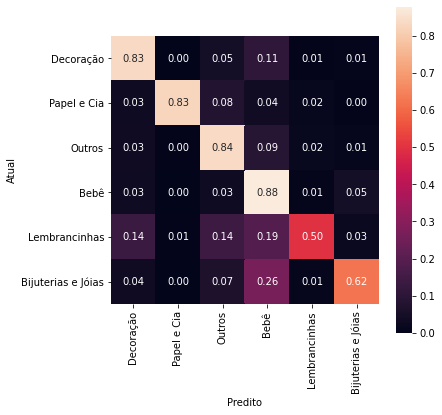

In [77]:
# Criando a Matriz de Confusão para verificar como ficou o treinamento do meu modelo
target_names = df.category.unique()
cm = confusion_matrix(y_test, cat_prev)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, square=True)
plt.ylabel('Atual')
plt.xlabel('Predito')
plt.show(block=False)

## **Conclusão**

Utilizando a biblioteca `spacy`, obteve-se um modelo com bom desempenho, assim como na primeira abordagem, mesmo somente com a coluna `title` e sem balancear os dados, visando que não foi realizado nenhum pré-processamento, pois a biblioteca já trata os dados textuais internamente. Vale ressaltar o tempo maior que é gasto no treinamento do modelo, em comparação aos três modelos utilizados anteriormente.